In [121]:
import numpy as np
from matplotlib import pyplot as plt

Task 1: Load the date from above mentioned CSV files. Plot the motion measurements
(files moveX.csv and moveY.csv). (They will look as shown in figure 2).

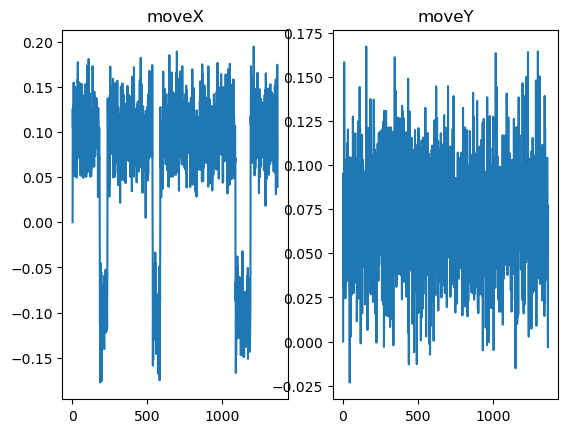

In [122]:
world = np.genfromtxt('data/world.csv', delimiter=',')

lmPos = np.genfromtxt('data/lmPos.csv', delimiter=',')
sensNoiseVar = np.genfromtxt('data/sensNoiseVar.csv', delimiter=',')
moveNoiseVar = np.genfromtxt("data/moveNoiseVar.csv", delimiter=',')
moveX = np.genfromtxt("data/moveX.csv", delimiter=',')
moveY = np.genfromtxt("data/moveY.csv", delimiter=',')
measLM1Dist = np.genfromtxt("data/measLM1Dist.csv", delimiter=',')
measLM2Dist = np.genfromtxt("data/measLM2Dist.csv", delimiter=',')
measLM3Dist = np.genfromtxt("data/measLM3Dist.csv", delimiter=',')
measLM4Dist = np.genfromtxt("data/measLM4Dist.csv", delimiter=',')

plt.subplot(1, 2, 1)
times = np.arange(1, 1368)
plt.plot(times, moveX)
plt.title("moveX")
plt.subplot(1, 2, 2)
plt.plot(times, moveY)
plt.title("moveY")

plt.show()

Plot the noisy distance measurements for each of the four landmarks. Use different
colors for each landmark, for better visualization. (They will look as shown in figure 3).

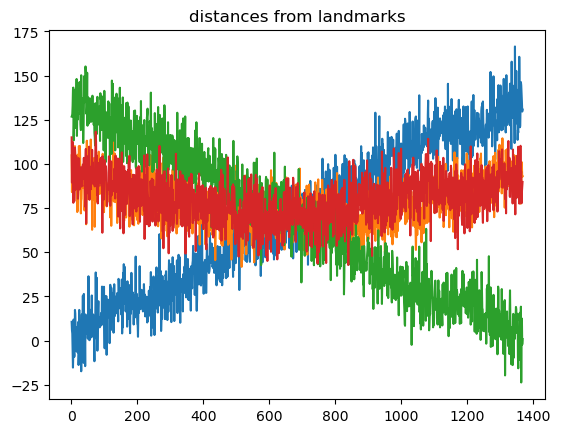

In [123]:
plt.plot(times, measLM1Dist)
plt.plot(times, measLM2Dist)
plt.plot(times, measLM3Dist)
plt.plot(times, measLM4Dist)
plt.title("distances from landmarks")
plt.show()

Task 3: Plots the four landmark positions. (For example, as shown in figure 4.)

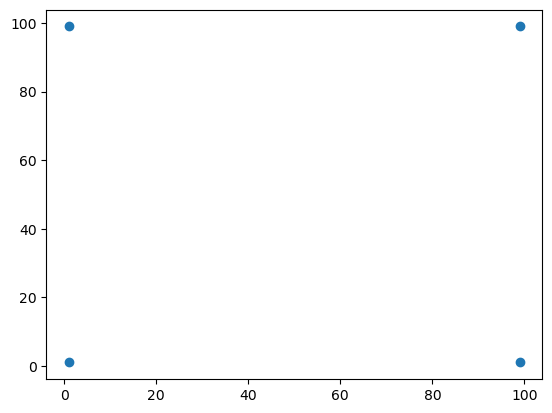

In [124]:
plt.plot(lmPos[0], lmPos[1], 'o')
plt.show()

Task 4: Generate a set of 1000 randomly distributed particles (within the limits of the
world). Their mean represents our best estimate of the vehicle location. Plot them, and also
their mean. My plot looks as shown in figure 5. (yours will look something similar).

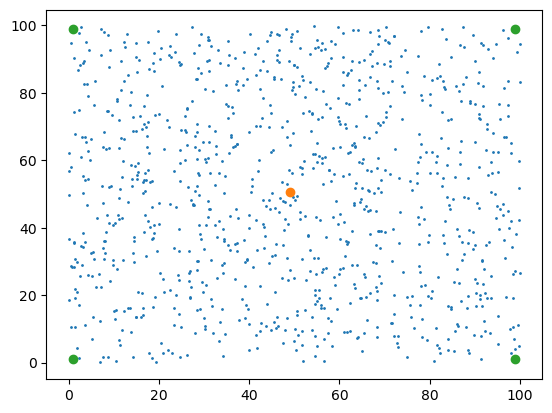

In [125]:
rand_particles = np.random.uniform(0, 100, (2, 1000))
plt.plot(rand_particles[0], rand_particles[1], 'o', markersize=1)
plt.plot(np.mean(rand_particles[0]), np.mean(rand_particles[1]), 'o')
plt.plot(lmPos[0], lmPos[1], 'o')
plt.show()

mplement map-based localization using particle filter. You can use the algorithm
provided in the separate file (and your notes and reading material from the lecture). Plot
absolute position error in vehicle position estimates (here, gtPos.csv file will be needed, which
contains ground-truth positions that the vehicle traversed). My implementation resulted in
the plot shown in figure 6. Yours will probably be something similar. (You can also take a
look at the provided video of how the particle set evolves over time, as the vehicle moves and
new measurements come in.)

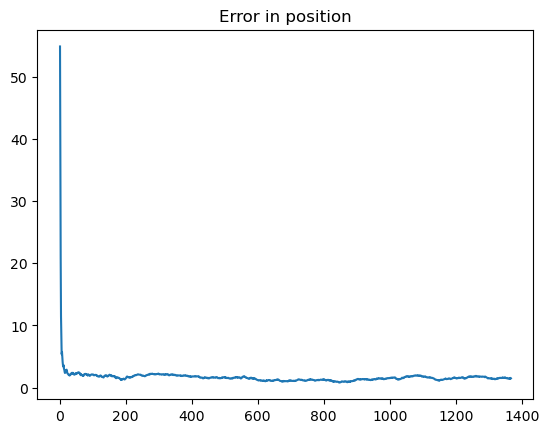

In [126]:
def localize(n):
    state_evolution_inner = []
    N = n
    P = np.random.uniform(0, 100, (2, N))
    for i in range(len(times)):
        #motion
        P[0] = P[0] + moveX[i] + np.random.normal(0, np.sqrt(moveNoiseVar), P[0].shape)
        P[1] = P[1] + moveY[i] + np.random.normal(0, np.sqrt(moveNoiseVar), P[0].shape)
        #Measureents

        lm1_dist = measLM1Dist[i]
        lm2_dist = measLM2Dist[i]
        lm3_dist = measLM3Dist[i]
        lm4_dist = measLM4Dist[i]

        expected_dist_lm1 = np.linalg.norm(P.T - lmPos.T[0], axis=1) + np.random.normal(0, np.sqrt(sensNoiseVar),
                                                                                        P[0].shape)
        expected_dist_lm2 = np.linalg.norm(P.T - lmPos.T[1], axis=1) + np.random.normal(0, np.sqrt(sensNoiseVar),
                                                                                        P[0].shape)
        expected_dist_lm3 = np.linalg.norm(P.T - lmPos.T[2], axis=1) + np.random.normal(0, np.sqrt(sensNoiseVar),
                                                                                        P[0].shape)
        expected_dist_lm4 = np.linalg.norm(P.T - lmPos.T[3], axis=1) + np.random.normal(0, np.sqrt(sensNoiseVar),
                                                                                        P[0].shape)

        errors = np.sum([np.abs(expected_dist_lm1 - lm1_dist), np.abs(expected_dist_lm2 - lm2_dist),
                         np.abs(expected_dist_lm3 - lm3_dist), np.abs(expected_dist_lm4 - lm4_dist)], axis=0)
        w = 1 / errors
        alpha = w / np.sum(w)
        indices = np.random.choice(np.arange(N), size=N, replace=True, p=alpha)
        P[0] = P[0][indices]
        P[1] = P[1][indices]
        best_estimate = np.array([np.mean(P[0]), np.mean(P[1])])
        state_evolution_inner.append(best_estimate)
    return state_evolution_inner


stateEvolution = localize(1000)

gtPos = np.genfromtxt('data/gtPos.csv', delimiter=',')

plt.plot(times, np.linalg.norm(gtPos.T - stateEvolution, axis=1))
plt.title('Error in position')
plt.show()



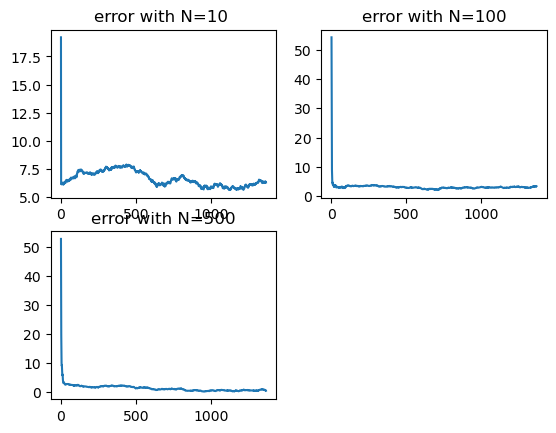

In [127]:
stateEvolution_10 = localize(10)
stateEvolution_100 = localize(100)
stateEvolution_500 = localize(500)

plt.subplot(2,2,1)
plt.plot(times,np.linalg.norm(gtPos.T - stateEvolution_10, axis=1))
plt.title('error with N=10 ')
plt.subplot(2,2,2)
plt.plot(times,np.linalg.norm(gtPos.T - stateEvolution_100, axis=1))
plt.title('error with N=100')
plt.subplot(2,2,3)
plt.plot(times,np.linalg.norm(gtPos.T - stateEvolution_500, axis=1))
plt.title('error with N=500')
plt.show()